# Problem Statement:
#Help the company to expedite the Promotion cycle.
#HR would take appropriate decision and Data Science would help them to take better decision.
#Find the suitable candidate for the promotion based on different metrics.

In [1]:
#Check the current working Diectory:
import os
os.getcwd()

'F:\\2020\\Hackathon\\Code\\3. HRAnalytics'

In [2]:
#Load the required libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#Load the train and test data:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

#We would perform the Exploratory Data Analysis(EDA):

In [4]:
#Check the header for train data:
train_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [5]:
#Check the header for test data:
test_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [6]:
#Test data has no "is_promoted" column so is_promoted is the "Target or Label Column":

In [7]:
#Check the tail for the train Data:
train_data.tail()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0
54807,51526,HR,region_22,Bachelor's,m,other,1,27,1.0,5,0,0,49,0


In [8]:
#Check the tail(last 5 records or observations) for the test data:
test_data.tail()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70
23489,5973,Technology,region_17,Master's & above,m,other,3,40,5.0,5,1,0,89


In [9]:
#Observations: Data is loaded Properly:

# Check the dimension:

In [10]:
#Check the dimension for the train and test data:
print("Dimension for the train_data:",train_data.shape)
print("Dimension fot the test_data:",test_data.shape)

Dimension for the train_data: (54808, 14)
Dimension fot the test_data: (23490, 13)


In [11]:
#Check the Column Names:
print(train_data.columns)
print("------------------------------------------------------------------")
print(test_data.columns)

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')
------------------------------------------------------------------
Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score'],
      dtype='object')


In [12]:
#Check the attribute types of train_data and test_data:
print("Attributes information about train_data:")
print(train_data.dtypes)
print("--------------------------------------------------------------")
print("Attributes information about test_data:")
print(test_data.dtypes)

Attributes information about train_data:
employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object
--------------------------------------------------------------
Attributes information about test_data:
employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_traini

In [13]:
#Store the employee_id for further mapping:
train_employee_id = train_data[["employee_id"]]
test_employee_id = test_data[["employee_id"]]
#Store the Target(is_promoted) for further mapping:
train_is_promoted = train_data[["is_promoted"]]

In [14]:
#Convert"KPIs_met >80%" , "awards_won?" & "is_promoted" into object:
train_data[["KPIs_met >80%"]] = train_data[["KPIs_met >80%"]].astype(object)
train_data[["awards_won?"]] = train_data[["awards_won?"]].astype(object)
train_data[["is_promoted"]] = train_data[["is_promoted"]].astype(object)
print("------------------------------------------------------------------------")
test_data[["KPIs_met >80%"]] = test_data[["KPIs_met >80%"]].astype(object)
test_data[["awards_won?"]] = test_data[["awards_won?"]].astype(object)

------------------------------------------------------------------------


In [15]:
train_data.dtypes


employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%            object
awards_won?              object
avg_training_score        int64
is_promoted              object
dtype: object

In [16]:
test_data.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%            object
awards_won?              object
avg_training_score        int64
dtype: object

In [17]:
print("Train_data attribute informations:",train_data.info())
print("----------------Separator-----------------------------")
print("Test_data attribute informations:",test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  object 
 11  awards_won?           54808 non-null  object 
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  object 
dtypes: float64(1), int64(5), object(8)
memory usage: 5.9+ MB
Train_data at

# Summary of the Dataset:

In [18]:
#Describe the numerical data in train data:
print("Summary of the Numerical data in train_data:")
train_data.describe()

Summary of the Numerical data in train_data:


,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,avg_training_score
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,63.386750
std,22586.581449,0.609264,7.660169,1.259993,4.265094,13.371559
min,1.000000,1.000000,20.000000,1.000000,1.000000,39.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,51.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,60.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,76.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,99.000000


In [19]:
#Describe the numerical data in test data:
print("Summary of the Numerical data in test_data:")
test_data.describe()

Summary of the Numerical data in test_data:


,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,avg_training_score
count,23490.000000,23490.000000,23490.000000,21678.000000,23490.000000,23490.000000
mean,39041.399149,1.254236,34.782929,3.339146,5.810387,63.263133
std,22640.809201,0.600910,7.679492,1.263294,4.207917,13.411750
min,3.000000,1.000000,20.000000,1.000000,1.000000,39.000000
25%,19370.250000,1.000000,29.000000,3.000000,3.000000,51.000000
50%,38963.500000,1.000000,33.000000,3.000000,5.000000,60.000000
75%,58690.000000,1.000000,39.000000,4.000000,7.000000,76.000000
max,78295.000000,9.000000,60.000000,5.000000,34.000000,99.000000


In [20]:
#Describe the categorical data in train data:
print("Summary of the Categorical data in train_data:")
train_data.describe(include="object")

Summary of the Categorical data in train_data:


,department,region,education,gender,recruitment_channel,KPIs_met >80%,awards_won?,is_promoted
count,54808,54808,52399,54808,54808,54808,54808,54808
unique,9,34,3,2,3,2,2,2
top,Sales & Marketing,region_2,Bachelor's,m,other,0,0,0
freq,16840,12343,36669,38496,30446,35517,53538,50140


In [21]:
#Describe the categorical data in test data:
print("Summary of the Categorical data in test_data:")
test_data.describe(include="object")

Summary of the Categorical data in train_data:


,department,region,education,gender,recruitment_channel,KPIs_met >80%,awards_won?
count,23490,23490,22456,23490,23490,23490,23490
unique,9,34,3,2,3,2,2
top,Sales & Marketing,region_2,Bachelor's,m,other,0,0
freq,7315,5299,15578,16596,13078,15061,22955


In [22]:
#Separate the numerical and categorical attributes:
num_attr = ["no_of_trainings","age","previous_year_rating","length_of_service","avg_training_score"]
cat_attr = ["department","region","education","gender","recruitment_channel","KPIs_met >80%","awards_won?"]

In [23]:
#Make separate dataframe for num_attr and cat_attr for train_data:
train_num_attr = train_data[num_attr]
train_cat_attr = train_data[cat_attr]

In [24]:
train_num_attr.head()

,no_of_trainings,age,previous_year_rating,length_of_service,avg_training_score
0,1,35,5.0,8,49
1,1,30,5.0,4,60
2,1,34,3.0,7,50
3,2,39,1.0,10,50
4,1,45,3.0,2,73


In [25]:
train_cat_attr.head()

,department,region,education,gender,recruitment_channel,KPIs_met >80%,awards_won?
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,0
1,Operations,region_22,Bachelor's,m,other,0,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,0,0
3,Sales & Marketing,region_23,Bachelor's,m,other,0,0
4,Technology,region_26,Bachelor's,m,other,0,0


In [26]:
#Create dataframe for test data with num_attr and cat_attr:

In [27]:
#make separate dataframe for num_attr and cat_attr for test_data:
test_num_attr = test_data[num_attr]
test_cat_attr = test_data[cat_attr]

In [28]:
test_num_attr.head()

,no_of_trainings,age,previous_year_rating,length_of_service,avg_training_score
0,1,24,NaN,1,77
1,1,31,3.0,5,51
2,1,31,1.0,4,47
3,3,31,2.0,9,65
4,1,30,4.0,7,61


In [29]:
test_cat_attr.head()

,department,region,education,gender,recruitment_channel,KPIs_met >80%,awards_won?
0,Technology,region_26,Bachelor's,m,sourcing,1,0
1,HR,region_4,Bachelor's,f,other,0,0
2,Sales & Marketing,region_13,Bachelor's,m,other,0,0
3,Procurement,region_2,Bachelor's,f,other,0,0
4,Finance,region_29,Bachelor's,m,sourcing,0,0


# Missing Value Treatment:

In [30]:
#Missing values in train_num_attr and train_cat_attr:
print(train_num_attr.isna().sum())
print("--------------------------")
print(train_cat_attr.isna().sum())

no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
avg_training_score         0
dtype: int64
--------------------------
department                0
region                    0
education              2409
gender                    0
recruitment_channel       0
KPIs_met >80%             0
awards_won?               0
dtype: int64


In [31]:
#Missing values in train_num_attr and train_cat_attr in Percentage:
print(train_num_attr.isna().sum()/train_num_attr.shape[0]*100)
print("--------------------------")
print(train_cat_attr.isna().sum()/train_num_attr.shape[0]*100)

no_of_trainings         0.000000
age                     0.000000
previous_year_rating    7.524449
length_of_service       0.000000
avg_training_score      0.000000
dtype: float64
--------------------------
department             0.000000
region                 0.000000
education              4.395344
gender                 0.000000
recruitment_channel    0.000000
KPIs_met >80%          0.000000
awards_won?            0.000000
dtype: float64


In [32]:
#Fill the missing values using the median(Numerical data) mode(Categorical data) for the categorical data:
median1 = train_num_attr[["previous_year_rating"]].median()
import statistics
mode1 = statistics.mode(train_cat_attr["education"]) #Don't use the double bracket here
print(median1[0])
print(mode1)

3.0
education


In [33]:
train_num_attr["previous_year_rating"].replace(np.nan,median1[0],inplace=True)
train_cat_attr["education"].replace(np.nan,mode1,inplace=True)

C:\Users\HARIOHM\anaconda3\lib\site-packages\pandas\core\series.py:4569: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [34]:
#Check missing values once again after Imputation  in train_num_attr and train_cat_attr:
print(train_num_attr.isna().sum())
print("--------------------------")
print(train_cat_attr.isna().sum())
#Observation:It is filled.

no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
avg_training_score      0
dtype: int64
--------------------------
department             0
region                 0
education              0
gender                 0
recruitment_channel    0
KPIs_met >80%          0
awards_won?            0
dtype: int64


In [35]:
#Missing values in test_num_attr and test_cat_attr in Percentage:
print(test_num_attr.isna().sum()/test_num_attr.shape[0]*100)
print("--------------------------")
print(test_cat_attr.isna().sum()/test_num_attr.shape[0]*100)

no_of_trainings         0.000000
age                     0.000000
previous_year_rating    7.713921
length_of_service       0.000000
avg_training_score      0.000000
dtype: float64
--------------------------
department             0.000000
region                 0.000000
education              4.401873
gender                 0.000000
recruitment_channel    0.000000
KPIs_met >80%          0.000000
awards_won?            0.000000
dtype: float64


In [36]:
#Create median and mode values for imputation:
median2 = test_num_attr[["previous_year_rating"]].median()[0]
import statistics
mode2 = statistics.mode(test_cat_attr[["education"]])
print(median2)
print(mode2)

3.0
education


In [37]:
test_num_attr["previous_year_rating"].replace(np.nan,median2,inplace=True)
test_cat_attr["education"].replace(np.nan,mode2,inplace=True)

In [38]:
# Check the Missing values in test_num_attr and test_cat_attr in Percentage once again:
print(test_num_attr.isna().sum()/test_num_attr.shape[0]*100)
print("--------------------------")
print(test_cat_attr.isna().sum()/test_num_attr.shape[0]*100)

no_of_trainings         0.0
age                     0.0
previous_year_rating    0.0
length_of_service       0.0
avg_training_score      0.0
dtype: float64
--------------------------
department             0.0
region                 0.0
education              0.0
gender                 0.0
recruitment_channel    0.0
KPIs_met >80%          0.0
awards_won?            0.0
dtype: float64


# Outlier Treatment:

<AxesSubplot:>

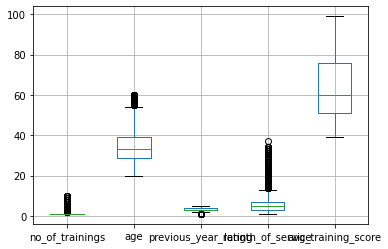

In [39]:
#Use the Box and Whisker Plot:

train_num_attr.boxplot(column = num_attr)

<AxesSubplot:>

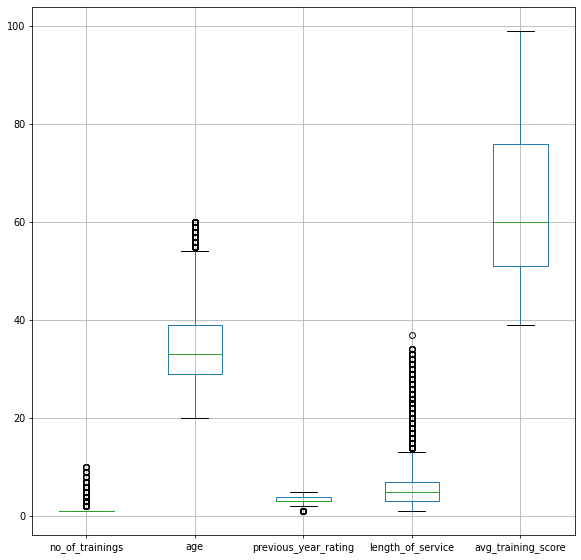

In [40]:
#Increase the Size of the Graph:
width_in_inches = 10
height_in_inches = 10
dots_per_inch = 70

plt.figure(
    figsize=(width_in_inches, height_in_inches),
    dpi=dots_per_inch)
train_num_attr.boxplot(column = num_attr)

In [41]:
#It is observed that outlier is present. 
#as per the domain understanding it migh not 
#But statistically it has outlier present.
#We can treat the Outlier by:
#1. Drop the Outlier
#2. Replace the outlier Values using IQR

In [42]:
#Create a user defined function called remove_outlier for getting the threshold value from IQR.
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range = Q1-(1.5*IQR)
    upper_range = Q3+(1.5*IQR)
    return lower_range,upper_range

In [43]:
#Remove the Outlier from no_of_trainings:
lowincome,uppincome=remove_outlier(train_num_attr["no_of_trainings"])
train_num_attr[["no_of_trainings"]] = np.where(train_num_attr[["no_of_trainings"]]>uppincome,uppincome,train_num_attr[["no_of_trainings"]])
train_num_attr[["no_of_trainings"]] = np.where(train_num_attr[["no_of_trainings"]]<lowincome,lowincome,train_num_attr[["no_of_trainings"]])

C:\Users\HARIOHM\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\HARIOHM\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
C:\Users\HARIOHM\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

In [44]:
#Remove the Outlier from age:
lowincome,uppincome=remove_outlier(train_num_attr["age"])
train_num_attr[["age"]] = np.where(train_num_attr[["age"]]>uppincome,uppincome,train_num_attr[["age"]])
train_num_attr[["age"]] = np.where(train_num_attr[["age"]]<lowincome,lowincome,train_num_attr[["age"]])

C:\Users\HARIOHM\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\HARIOHM\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
C:\Users\HARIOHM\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

In [45]:
#Remove the Outlier from no_of_trainings:
lowincome,uppincome=remove_outlier(train_num_attr["length_of_service"])
train_num_attr[["length_of_service"]] = np.where(train_num_attr[["length_of_service"]]>uppincome,uppincome,train_num_attr[["length_of_service"]])
train_num_attr[["length_of_service"]] = np.where(train_num_attr[["length_of_service"]]<lowincome,lowincome,train_num_attr[["length_of_service"]])

C:\Users\HARIOHM\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\HARIOHM\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
C:\Users\HARIOHM\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

<AxesSubplot:>

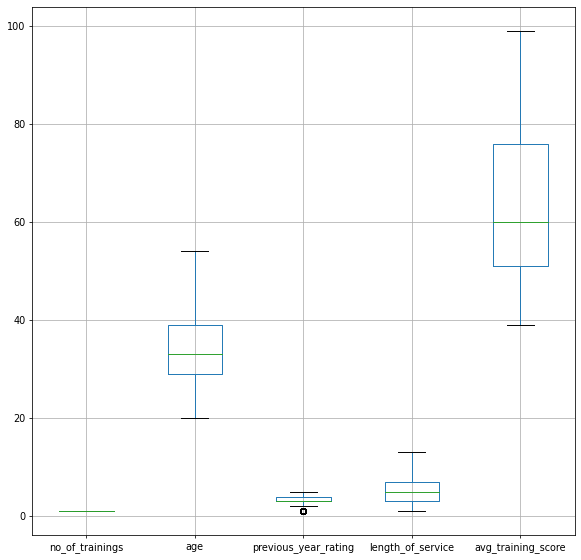

In [46]:
#Increase the Size of the Graph:
width_in_inches = 10
height_in_inches = 10
dots_per_inch = 70

plt.figure(
    figsize=(width_in_inches, height_in_inches),
    dpi=dots_per_inch)
train_num_attr.boxplot(column = num_attr)

In [47]:
#There is no outlier as per the observation.
#We would not go for the Outlier detection and removal from test data.

# Scaling through Standardizations:

In [48]:
from sklearn.preprocessing import StandardScaler
StdScale = StandardScaler()

In [49]:
#Scale the train_num_attr  data(Only Numerical data):
train_num_attr[['no_of_trainings']] = StdScale.fit_transform(train_num_attr[['no_of_trainings']])
train_num_attr[['age']] = StdScale.fit_transform(train_num_attr[['age']])
train_num_attr[['previous_year_rating']] = StdScale.fit_transform(train_num_attr[['previous_year_rating']])
train_num_attr[['length_of_service']] = StdScale.fit_transform(train_num_attr[['length_of_service']])
train_num_attr[['avg_training_score']] = StdScale.fit_transform(train_num_attr[['avg_training_score']])

C:\Users\HARIOHM\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\HARIOHM\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
C:\Users\HARIOHM\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [50]:
#Scale the train_num_attr  data(Only Numerical data):
test_num_attr[['no_of_trainings']] = StdScale.fit_transform(test_num_attr[['no_of_trainings']])
test_num_attr[['age']] = StdScale.fit_transform(test_num_attr[['age']])
test_num_attr[['previous_year_rating']] = StdScale.fit_transform(test_num_attr[['previous_year_rating']])
test_num_attr[['length_of_service']] = StdScale.fit_transform(test_num_attr[['length_of_service']])
test_num_attr[['avg_training_score']] = StdScale.fit_transform(test_num_attr[['avg_training_score']])

C:\Users\HARIOHM\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\HARIOHM\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
C:\Users\HARIOHM\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [51]:
#Check the transformed train_num_attr:
train_num_attr.head()

,no_of_trainings,age,previous_year_rating,length_of_service,avg_training_score
0,0.0,0.038093,1.395766,0.711461,-1.075931
1,0.0,-0.636174,1.395766,-0.460068,-0.253282
2,0.0,-0.096760,-0.250651,0.418579,-1.001145
3,0.0,0.577506,-1.897069,1.297225,-1.001145
4,0.0,1.386626,-0.250651,-1.045832,0.718939


In [52]:
test_num_attr.head()

,no_of_trainings,age,previous_year_rating,length_of_service,avg_training_score
0,-0.423094,-1.404150,-0.257191,-1.143200,1.024263
1,-0.423094,-0.492612,-0.257191,-0.192590,-0.914377
2,-0.423094,-0.492612,-1.900667,-0.430243,-1.212629
3,2.905264,-0.492612,-1.078929,0.758019,0.129506
4,-0.423094,-0.622832,0.564547,0.282714,-0.168746


In [53]:
#Encode the categorical data of train_cat_attr data:
dummies1 = pd.get_dummies(train_cat_attr[['department',
 'region',
 'education',
 'gender',
 'recruitment_channel',
 'KPIs_met >80%',
 'awards_won?']],drop_first=True)
dummies1.head()

,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,region_region_10,region_region_11,...,region_region_8,region_region_9,education_Below Secondary,education_Master's & above,education_education,gender_m,recruitment_channel_referred,recruitment_channel_sourcing,KPIs_met >80%_1,awards_won?_1
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,1,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [54]:
#Dummification for the categorical data of train data:
dummies2 = pd.get_dummies(test_cat_attr[['department',
 'region',
 'education',
 'gender',
 'recruitment_channel',
 'KPIs_met >80%',
 'awards_won?']],drop_first=True)
dummies2.head()

,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,region_region_10,region_region_11,...,region_region_8,region_region_9,education_Below Secondary,education_Master's & above,education_education,gender_m,recruitment_channel_referred,recruitment_channel_sourcing,KPIs_met >80%_1,awards_won?_1
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,1,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [55]:
#Combine the scaled train_num_attr and dummies1:
#Combine the numerical and Categorical data for train_data:
#Combine the train_num_attr and dummies1:
train_final = pd.concat([train_num_attr,dummies1,train_is_promoted],axis=1)
train_final.head()

,no_of_trainings,age,previous_year_rating,length_of_service,avg_training_score,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,...,region_region_9,education_Below Secondary,education_Master's & above,education_education,gender_m,recruitment_channel_referred,recruitment_channel_sourcing,KPIs_met >80%_1,awards_won?_1,is_promoted
0,0.0,0.038093,1.395766,0.711461,-1.075931,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
1,0.0,-0.636174,1.395766,-0.460068,-0.253282,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0.0,-0.096760,-0.250651,0.418579,-1.001145,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3,0.0,0.577506,-1.897069,1.297225,-1.001145,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0.0,1.386626,-0.250651,-1.045832,0.718939,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [56]:
#Combine the scaled test_num_attr and dummies2:
#Combine the numerical and Categorical data for test_data:
#Combine the tesr_num_attr and dummies2:
test_final = pd.concat([test_num_attr,dummies2],axis=1)
test_final.head()

,no_of_trainings,age,previous_year_rating,length_of_service,avg_training_score,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,...,region_region_8,region_region_9,education_Below Secondary,education_Master's & above,education_education,gender_m,recruitment_channel_referred,recruitment_channel_sourcing,KPIs_met >80%_1,awards_won?_1
0,-0.423094,-1.404150,-0.257191,-1.143200,1.024263,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
1,-0.423094,-0.492612,-0.257191,-0.192590,-0.914377,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.423094,-0.492612,-1.900667,-0.430243,-1.212629,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,2.905264,-0.492612,-1.078929,0.758019,0.129506,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,-0.423094,-0.622832,0.564547,0.282714,-0.168746,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [57]:
#New Dimesnion for the train_final and test_final data:
print("Dimension for the train_final:",train_final.shape)
print("Dimension for the test_final:",test_final.shape)

Dimension for the train_final: (54808, 55)
Dimension for the test_final: (23490, 54)


In [58]:
#Train_columns:
train_final.columns

Index(['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'avg_training_score', 'department_Finance', 'department_HR',
       'department_Legal', 'department_Operations', 'department_Procurement',
       'department_R&D', 'department_Sales & Marketing',
       'department_Technology', 'region_region_10', 'region_region_11',
       'region_region_12', 'region_region_13', 'region_region_14',
       'region_region_15', 'region_region_16', 'region_region_17',
       'region_region_18', 'region_region_19', 'region_region_2',
       'region_region_20', 'region_region_21', 'region_region_22',
       'region_region_23', 'region_region_24', 'region_region_25',
       'region_region_26', 'region_region_27', 'region_region_28',
       'region_region_29', 'region_region_3', 'region_region_30',
       'region_region_31', 'region_region_32', 'region_region_33',
       'region_region_34', 'region_region_4', 'region_region_5',
       'region_region_6', 'region_region_7', 're

In [59]:
#Test Columns:
test_final.columns

Index(['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'avg_training_score', 'department_Finance', 'department_HR',
       'department_Legal', 'department_Operations', 'department_Procurement',
       'department_R&D', 'department_Sales & Marketing',
       'department_Technology', 'region_region_10', 'region_region_11',
       'region_region_12', 'region_region_13', 'region_region_14',
       'region_region_15', 'region_region_16', 'region_region_17',
       'region_region_18', 'region_region_19', 'region_region_2',
       'region_region_20', 'region_region_21', 'region_region_22',
       'region_region_23', 'region_region_24', 'region_region_25',
       'region_region_26', 'region_region_27', 'region_region_28',
       'region_region_29', 'region_region_3', 'region_region_30',
       'region_region_31', 'region_region_32', 'region_region_33',
       'region_region_34', 'region_region_4', 'region_region_5',
       'region_region_6', 'region_region_7', 're

In [60]:
#We know the target column is "is_promoted":
train_final[["is_promoted"]].value_counts()

is_promoted
0              50140
1               4668
dtype: int64

In [61]:
#Data Distribution for the Crop_Damage(Target_Column):
#Value Percentage wise in target column("is_promoted"): 
train_final[["is_promoted"]].value_counts()/train_final.shape[0]*100

is_promoted
0              91.482995
1               8.517005
dtype: float64

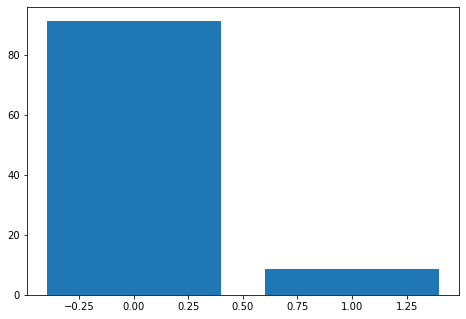

In [62]:
#Data Distribution for Target values:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Promotion_Status = [0,1]
value = [ 91.482995,8.517005]
ax.bar(Promotion_Status,value)
plt.show()

In [63]:
train_is_promoted = train_final[["is_promoted"]]
print(train_final.shape)
print(train_is_promoted.shape)
print(train_is_promoted.head())
print(type(train_is_promoted))

(54808, 55)
(54808, 1)
   is_promoted
0            0
1            0
2            0
3            0
4            0
<class 'pandas.core.frame.DataFrame'>


In [64]:
#Drop the "is_promoted" in train_final data:
train_final.drop(["is_promoted"],axis=1,inplace=True)

In [65]:
#Split train_final into train and test:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(train_final,train_is_promoted,test_size=0.20,random_state=123)

In [66]:
print(train_final.shape)
print(train_is_promoted.shape)

(54808, 54)
(54808, 1)


In [67]:
X_train.size,X_test.size

(2367684, 591948)

In [68]:
y_train.size,y_test.size

(43846, 10962)

In [69]:
X_train.shape,y_train.shape

((43846, 54), (43846, 1))

In [70]:
#After Observing the Target column which has three levels(0,1)
#This is a classification Problem.

# 1. Logistic Regression:

In [71]:
#Build the LogisticRegression:
from sklearn.linear_model import LogisticRegression
LogR = LogisticRegression(solver="lbfgs")
#Build the Model:
LogR.fit(X_train,y_train)

C:\Users\HARIOHM\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\HARIOHM\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [72]:
#Predict on X_train itself to verify with the actual result:
pred_X_train = LogR.predict(X_train)

In [73]:
#Predict on Validation Data which is (X_test) and actual_test data:
pred_X_test_log = LogR.predict(X_test)
pred_test_log = LogR.predict(test_final)

In [74]:
#Check the Metrics on X_train using which model was built:
from sklearn.metrics import classification_report,accuracy_score
result_X_train_log = classification_report(pred_X_train,y_train)
result_X_test_log = classification_report(pred_X_test_log,y_test)
print("-----Result on Train Data-----------")
print(result_X_train_log)
print("-----Result on Validation Data------")
print(result_X_test_log)
#classification_report()

-----Result on Train Data-----------
              precision    recall  f1-score   support

           0       1.00      0.93      0.96     42730
           1       0.25      0.83      0.38      1116

    accuracy                           0.93     43846
   macro avg       0.62      0.88      0.67     43846
weighted avg       0.98      0.93      0.95     43846

-----Result on Validation Data------
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     10698
           1       0.24      0.83      0.38       264

    accuracy                           0.93     10962
   macro avg       0.62      0.88      0.67     10962
weighted avg       0.98      0.93      0.95     10962



In [75]:
#Concat the test_employee_id and pred_test:
Sub_Log = pd.concat([test_employee_id,pd.Series(pred_test_log)],axis=1)

In [76]:
Sub_Log.head()

,employee_id,0
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [77]:
Sub_Log.rename(columns={0:"is_promoted"},inplace=True)

In [78]:
Sub_Log.head()

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [79]:
#Export Result into Local System:
Sub_Log.to_csv("1.Sub_Log.csv",index=False)

In [80]:
#Result on Portal:
#Your score for this submission is : 0.3657587548638132.

# 2. KNN Classifier

In [81]:
#Build the KNN Model(Modelless) Algorithm:
from sklearn.neighbors import KNeighborsClassifier
KNN_class = KNeighborsClassifier(n_neighbors = 5,metric = "minkowski",p=2)
#Build the Model:
KNN_class.fit(X_train,y_train)

C:\Users\HARIOHM\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


KNeighborsClassifier()

In [82]:
#Predict on X_train itself to verify with the actual result:
pred_X_train_KNN = KNN_class.predict(X_train)

In [83]:
#Predict on Validation Data which is (X_test) and actual_test data:
pred_X_test_KNN = KNN_class.predict(X_test)
pred_test_KNN = KNN_class.predict(test_final)

In [84]:
#Check the Metrics on X_train using which model was built:
from sklearn.metrics import classification_report,accuracy_score
result_X_train_KNN = classification_report(pred_X_train_KNN,y_train)
result_X_test_KNN = classification_report(pred_X_test_KNN,y_test)
print("-----Result on Train Data-----------")
print(result_X_train_KNN)
print("-----Result on Validation Data------")
print(result_X_test_KNN)
#classification_report()

-----Result on Train Data-----------
              precision    recall  f1-score   support

           0       1.00      0.93      0.96     42837
           1       0.22      0.82      0.35      1009

    accuracy                           0.93     43846
   macro avg       0.61      0.88      0.65     43846
weighted avg       0.98      0.93      0.95     43846

-----Result on Validation Data------
              precision    recall  f1-score   support

           0       0.99      0.93      0.96     10769
           1       0.10      0.48      0.17       193

    accuracy                           0.92     10962
   macro avg       0.55      0.70      0.56     10962
weighted avg       0.97      0.92      0.94     10962



In [85]:
#Concat the test_employee_id and pred_test:
Sub_KNN = pd.concat([test_employee_id,pd.Series(pred_test_KNN)],axis=1)

In [86]:
Sub_KNN.head()

,employee_id,0
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [87]:
#Rename the ColumnName:
Sub_KNN.rename(columns = {0:"is_promoted"},inplace=True)

In [88]:
Sub_KNN.head()

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [89]:
Sub_KNN.to_csv("2.sub_KNN.csv",index=False)

In [90]:
#Portal Result:
#Your score for this submission is : 0.16994818652849739.

# 3.Naive Bayes

In [91]:
from sklearn.naive_bayes import GaussianNB
GNB_class = GaussianNB()
#Build the Model:
GNB_class.fit(X_train,y_train)

C:\Users\HARIOHM\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GaussianNB()

In [92]:
#Predict on X_train itself to verify with the actual result:
pred_X_train_NB = GNB_class.predict(X_train)

In [93]:
#Predict on Validation Data which is (X_test) and actual_test data:
pred_X_test_NB = GNB_class.predict(X_test)
pred_test_NB = GNB_class.predict(test_final)

In [94]:
#Check the Metrics on X_train using which model was built:
from sklearn.metrics import classification_report,accuracy_score
result_X_train_NB = classification_report(pred_X_train_NB,y_train)
result_X_test_NB = classification_report(pred_X_test_NB,y_test)
print("-----Result on Train Data-----------")
print(result_X_train_NB)
print("-----Result on Validation Data------")
print(result_X_test_NB)
#classification_report()

-----Result on Train Data-----------
              precision    recall  f1-score   support

           0       0.49      0.96      0.65     20562
           1       0.78      0.13      0.22     23284

    accuracy                           0.52     43846
   macro avg       0.64      0.54      0.43     43846
weighted avg       0.65      0.52      0.42     43846

-----Result on Validation Data------
              precision    recall  f1-score   support

           0       0.49      0.96      0.65      5169
           1       0.75      0.12      0.20      5793

    accuracy                           0.51     10962
   macro avg       0.62      0.54      0.42     10962
weighted avg       0.63      0.51      0.41     10962



In [95]:
#Concat the test_employee_id and pred_test:
Sub_NB = pd.concat([test_employee_id,pd.Series(pred_test_NB)],axis=1)

In [96]:
Sub_NB.head()

,employee_id,0
0,8724,0
1,74430,1
2,72255,0
3,38562,1
4,64486,0


In [97]:
Sub_NB.rename(columns = {0:"is_promoted"},inplace=True)

In [98]:
#Download into Local System:
Sub_NB.to_csv("3.Sub_NB.csv",index=False)

In [99]:
#Result on Portal:
#Your score for this submission is : 0.20947718132540655.

# 4. Decision Tree Classifier:

In [100]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
#Build the Model:
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [101]:
#Predict on X_train itself to verify with the actual result:
pred_X_train_DT = DT.predict(X_train)

In [102]:
#Predict on Validation Data which is (X_test) and actual_test data:
pred_X_test_DT = DT.predict(X_test)
pred_test_DT = DT.predict(test_final)

In [103]:
#Check the Metrics on X_train using which model was built:
from sklearn.metrics import classification_report,accuracy_score
result_X_train_DT = classification_report(pred_X_train_DT,y_train)
result_X_test_DT = classification_report(pred_X_test_DT,y_test)
print("-----Result on Train Data-----------")
print(result_X_train_DT)
print("-----Result on Validation Data------")
print(result_X_test_DT)
#classification_report()

-----Result on Train Data-----------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     40093
           1       1.00      1.00      1.00      3753

    accuracy                           1.00     43846
   macro avg       1.00      1.00      1.00     43846
weighted avg       1.00      1.00      1.00     43846

-----Result on Validation Data------
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      9929
           1       0.45      0.39      0.42      1033

    accuracy                           0.90     10962
   macro avg       0.69      0.67      0.68     10962
weighted avg       0.89      0.90      0.89     10962



In [104]:
#Concat the test_employee_id and pred_test:
Sub_DT = pd.concat([test_employee_id ,pd.Series(pred_test_DT)],axis=1)

In [105]:
Sub_DT.head()

,employee_id,0
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [106]:
#Rename the Column:
Sub_DT.rename(columns = {0:"is_promoted"},inplace=True)

In [107]:
#Download into Local System:
Sub_DT.to_csv("4.Sub_DT.csv",index=False)


In [108]:
#Result on Portal:
##Your score for this submission is : 0.4258823529411765.

# 5. Random Forest:

In [109]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
#Build the Model:
rf.fit(X_train,y_train)

C:\Users\HARIOHM\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier()

In [110]:
#Predict on X_train itself to verify with the actual result:
pred_X_train_rf = rf.predict(X_train)

In [111]:
#Predict on Validation Data which is (X_test) and actual_test data:
pred_X_test_rf = rf.predict(X_test)
pred_test_rf = rf.predict(test_final)

In [112]:
#Check the Metrics on X_train using which model was built:
from sklearn.metrics import classification_report,accuracy_score
result_X_train_rf = classification_report(pred_X_train_rf,y_train)
result_X_test_rf = classification_report(pred_X_test_rf,y_test)
print("--------------------------Result on Train Data-----------")
print(result_X_train_rf)
print("--------------------------Result on Validation Data------")
print(result_X_test_rf)
#classification_report()

--------------------------Result on Train Data-----------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     40089
           1       1.00      1.00      1.00      3757

    accuracy                           1.00     43846
   macro avg       1.00      1.00      1.00     43846
weighted avg       1.00      1.00      1.00     43846

--------------------------Result on Validation Data------
              precision    recall  f1-score   support

           0       0.99      0.94      0.97     10611
           1       0.32      0.82      0.46       351

    accuracy                           0.94     10962
   macro avg       0.66      0.88      0.72     10962
weighted avg       0.97      0.94      0.95     10962



In [113]:
#Concat the test_employee_id and pred_test:
Sub_rf = pd.concat([test_employee_id,pd.Series(pred_test_rf)],axis=1)

In [114]:
Sub_rf.head()

,employee_id,0
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [115]:
Sub_rf.rename(columns={0:"is_promoted"},inplace=True)

In [116]:
Sub_rf.head()

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [117]:
#Download into Local System:
Sub_DT.to_csv("5.Sub_rf.csv",index=False)

In [118]:
#Result on Portal:
#Your score for this submission is : 0.4258823529411765.

# 6. GradientBoosting Classifier:

In [119]:
from sklearn.ensemble import GradientBoostingClassifier
GB = GradientBoostingClassifier()
#Model building
GB.fit(X_train,y_train)

C:\Users\HARIOHM\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GradientBoostingClassifier()

In [121]:
#Predict on X_train itself to verify with the actual result:
pred_X_train_GB = GB.predict(X_train)#Concat the test_ID and pred_test:


In [122]:
#Predict on Validation Data which is (X_test) and actual_test data:
pred_X_test_GB = rf.predict(X_test)
pred_test_GB = rf.predict(test_final)

In [123]:
#Check the Metrics on X_train using which model was built:
from sklearn.metrics import classification_report,accuracy_score
result_X_train_GB = classification_report(pred_X_train_GB,y_train)
result_X_test_GB = classification_report(pred_X_test_GB,y_test)
print("--------------------------Result on Train Data-----------")
print(result_X_train_GB)
print("--------------------------Result on Validation Data------")
print(result_X_test_GB)
#classification_report()

--------------------------Result on Train Data-----------
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     42686
           1       0.30      0.97      0.45      1160

    accuracy                           0.94     43846
   macro avg       0.65      0.95      0.71     43846
weighted avg       0.98      0.94      0.95     43846

--------------------------Result on Validation Data------
              precision    recall  f1-score   support

           0       0.99      0.94      0.97     10611
           1       0.32      0.82      0.46       351

    accuracy                           0.94     10962
   macro avg       0.66      0.88      0.72     10962
weighted avg       0.97      0.94      0.95     10962



In [124]:
#Concat the test_employee and pred_test:
Sub_GB = pd.concat([test_employee_id,pd.Series(pred_test_GB)],axis=1)

In [125]:
Sub_GB.head()

,employee_id,0
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [126]:
Sub_GB.rename(columns = {0:"is_promoted"},inplace=True)

In [127]:
Sub_GB.to_csv("6.Sub_GB.csv",index=False)

In [128]:
#Result on Portal:
#Your score for this submission is : 0.4045155221072436.

# 7.Hist Gradient Boosting Classifier

In [ ]:
#NOTE: This is still experiemental:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
HGB = HistGradientBoostingClassifier()
#Build Model:
HGB.fit(X_train,y_train)

C:\Users\HARIOHM\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [ ]:
#Predict on X_train itself to verify with the actual result:
pred_X_train_HGB = HGB.predict(X_train)

In [ ]:
#Predict on Validation Data which is (X_test) and actual_test data:
pred_X_test_HGB = HGB.predict(X_test)
pred_test_HGB = HGB.predict(test_final)

In [ ]:
#Check the Metrics on X_train using which model was built:
from sklearn.metrics import classification_report,accuracy_score
result_X_train_HGB = classification_report(pred_X_train_HGB,y_train)
result_X_test_HGB = classification_report(pred_X_test_HGB,y_test)
print("--------------------------Result on Train Data-----------")
print(result_X_train_HGB)
print("--------------------------Result on Validation Data------")
print(result_X_test_HGB)
#classification_report()

In [ ]:
#Concat the test_employee_id and pred_test:
Sub_HGB = pd.concat([test_employee_id,pd.Series(pred_test_HGB)],axis=1)

In [ ]:
Sub_HGB.head()

In [ ]:
Sub_HGB.rename(columns={0:"is_promoted"},inplace=True)

In [ ]:
Sub_HGB.head()

In [ ]:
Sub_HGB.to_csv("7.Sub_HGB.csv",index=False)

In [ ]:
#Result on Portal:
#Your score for this submission is : 0.46860356138706644.

# 8. Adaboost Classifier

In [ ]:
#Adaboost Classifier:
from sklearn.ensemble import AdaBoostClassifier
AD = AdaBoostClassifier()
#Build Model:
AD = AD.fit(X_train,y_train)

In [ ]:
#Predict on X_train itself to verify with the actual result:
pred_X_train_AD = AD.predict(X_train)

In [ ]:
#Predict on Validation Data which is (X_test) and actual_test data:
pred_X_test_AD = AD.predict(X_test)
pred_test_AD = AD.predict(test_final)

In [ ]:
#Check the Metrics on X_train using which model was built:
from sklearn.metrics import classification_report,accuracy_score
result_X_train_AD = classification_report(pred_X_train_AD,y_train)
result_X_test_AD = classification_report(pred_X_test_AD,y_test)
print("--------------------------Result on Train Data-----------")
print(result_X_train_AD)
print("--------------------------Result on Validation Data------")
print(result_X_test_AD)
#classification_report()

In [ ]:
#Concat the test_employee_id and pred_test_AD:
Sub_AD = pd.concat([test_employee_id,pd.Series(pred_test_AD)],axis=1)

In [ ]:
Sub_AD.head()

In [ ]:
Sub_AD.rename(columns = {0:"is_promoted"},inplace=True)

In [ ]:
Sub_AD.head()

In [ ]:
Sub_AD.to_csv("8.Sub_AD.csv",index=False)

In [ ]:
#Result On POrtal:
#Your score for this submission is : 0.28048780487804875.

# 9. Support Vector machine

In [ ]:
from sklearn.svm import SVC
#import "LinearSVC "
SVC = SVC()
#Model Building:
SVC.fit(X_train,y_train)

In [ ]:
#Predict on X_train itself to verify with the actual result:
pred_X_train_SVC = SVC.predict(X_train)

In [ ]:
#Predict on Validation Data which is (X_test) and actual_test data:
pred_X_test_SVC = SVC.predict(X_test)
pred_test_SVC = SVC.predict(test_final)

In [ ]:
#Predict on Validation Data which is (X_test) and actual_test data:
pred_X_test_SVC = SVC.predict(X_test)
pred_test_SVC = SVC.predict(test_final)

In [ ]:
#Check the Metrics on X_train using which model was built:
from sklearn.metrics import classification_report,accuracy_score
result_X_train_SVC = classification_report(pred_X_train_SVC,y_train)
result_X_test_SVC = classification_report(pred_X_test_SVC,y_test)
print("--------------------------Result on Train Data-----------")
print(result_X_train_SVC)
print("--------------------------Result on Validation Data------")
print(result_X_test_SVC)
#classification_report()

In [ ]:
#Concat the test_employee_id and pred_test_SVC:
Sub_SVC = pd.concat([test_employee_id,pd.Series(pred_test_SVC)],axis=1)

In [ ]:
Sub_SVC.head()

In [ ]:
Sub_SVC.rename( columns = {0:"is_promoted"},inplace=True)

In [ ]:
Sub_SVC.head()

In [ ]:
Sub_SVC.to_csv("9.Sub_SVC.csv",index=False)

In [ ]:
#Portal Result:
#Your score for this submission is : 0.3100634632819583.

# 10.XGBoost Classifier:

In [ ]:
# check xgboost version
import xgboost
print(xgboost.__version__)
#Note: If it is not installed then install using below command:
#sudo pip install xgboost

In [ ]:
#Xgboost Classifier:
import xgboost
from xgboost import XGBClassifier
XGB = XGBClassifier()
#Build the Model:
XGB.fit(X_train,y_train)

In [ ]:
#Predict on X_train itself to verify with the actual result:
pred_X_train_XGB = XGB.predict(X_train)

In [ ]:
#Predict on Validation Data which is (X_test) and actual_test data:
pred_X_test_XGB = XGB.predict(X_test)
pred_test_XGB = XGB.predict(test_final)

In [ ]:
#Check the Metrics on X_train using which model was built:
from sklearn.metrics import classification_report,accuracy_score
result_X_train_XGB = classification_report(pred_X_train_XGB,y_train)
result_X_test_XGB = classification_report(pred_X_test_XGB,y_test)
print("--------------------------Result on Train Data-----------")
print(result_X_train_XGB)
print("--------------------------Result on Validation Data------")
print(result_X_test_XGB)
#classification_report()

In [ ]:
#Concat the test_employee_id and pred_test_SVC:
Sub_XGB = pd.concat([test_employee_id,pd.Series(pred_test_XGB)],axis=1)

In [ ]:
Sub_XGB.head()

In [ ]:
Sub_XGB.rename(columns={0:"is_promoted"},inplace=True)

In [ ]:
Sub_XGB.to_csv("10.Sub_XGB.csv",index=False)

In [ ]:
#Result on Portal:
#Your score for this submission is : 0.4867337602927722

# 11.LightGBM

In [ ]:
#install the LightGBM:
#!pip install lightgbm
#sudo pip install lightgbm

In [ ]:
#import LightGradient Boosting Machine:
import lightgbm
print(lightgbm.__version__)

In [ ]:
from lightgbm import LGBMClassifier
LGBM= LGBMClassifier()
#Building the Model:
LGBM.fit(X_train,y_train)

In [ ]:
#Predict on X_train itself to verify with the actual result:
pred_X_train_LGBM = LGBM.predict(X_train)

In [ ]:
#Predict on Validation Data which is (X_test) and actual_test data:
pred_X_test_LGBM = LGBM.predict(X_test)
pred_test_LGBM = LGBM.predict(test_final)

In [ ]:
#Check the Metrics on X_train using which model was built:
from sklearn.metrics import classification_report,accuracy_score
result_X_train_LGBM = classification_report(pred_X_train_LGBM,y_train)
result_X_test_LGBM = classification_report(pred_X_test_LGBM,y_test)
print("--------------------------Result on Train Data for LGBM:-----------")
print(result_X_train_LGBM)
print("--------------------------Result on Validation Data LGBM:------")
print(result_X_test_LGBM)
#classification_report()

In [ ]:
#Concat the test_employee_id and pred_test_SVC:
Sub_LGBM = pd.concat([test_employee_id,pd.Series(pred_test_LGBM)],axis=1)

In [ ]:
Sub_LGBM.head()

In [ ]:
Sub_LGBM.rename(columns={0:"is_promoted"},inplace=True)

In [ ]:
Sub_LGBM.head()

In [ ]:
Sub_LGBM.to_csv("11.Sub_LGBM.csv",index=False)

In [ ]:
#Result on Portal:
#Your score for this submission is : 0.4785046728971962.

# 12.Gradient Boosting with CatBoost

In [ ]:
#It is also third party library:
#Installing catboost:
!pip install catboost
#sudo pip install catboost

In [ ]:
#Check the catboost version:
import catboost
print(catboost.__version__)

In [ ]:
from catboost import CatBoostClassifier
catb = CatBoostClassifier()
#Build the Model:
catb.fit(X_train,y_train)

In [ ]:
#Predict on X_train itself to verify with the actual result:
pred_X_train_catb = catb.predict(X_train)

In [ ]:
#Predict on Validation Data which is (X_test) and actual_test data:
pred_X_test_catb = catb.predict(X_test)
pred_test_catb =catb.predict(test_final)

In [ ]:
#Check the Metrics on X_train using which model was built:
from sklearn.metrics import classification_report,accuracy_score
result_X_train_catb = classification_report(pred_X_train_catb,y_train)
result_X_test_catb = classification_report(pred_X_test_catb,y_test)
print("--------------------------Result on Train Data for Catb:-----------")
print(result_X_train_catb)
print("--------------------------Result on Validation Data Catb:------")
print(result_X_test_catb)
#classification_report()

In [ ]:
#Concat the test_employee_id and pred_test_catb:
Sub_catb = pd.concat([test_employee_id,pd.DataFrame(pred_test_catb)],axis=1)

In [ ]:
Sub_catb.head()

In [ ]:
Sub_catb.rename(columns={0:'is_promoted'},inplace=True)

In [ ]:
Sub_catb.head()

In [ ]:
Sub_catb.to_csv("12.Sub_catb.csv",index=False)

In [ ]:
#Result on Portal:
#Your score for this submission is : 0.4958828911253431.